In [1]:
## Needed libs
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import time

timeProbabilityBased = []

timeSampleProductions = []

timeConcatProductions = []


def manipulate_probability_for_new_non_terminal():
    return {
        "probabilityForNewNonTerminal": 0.5,
        "probabilityForTerminal": 0.5,
        "probabilityForMultipleRightSide": 0.5,
        "probabilityFavourNonTerminalForTerminalOnRightSide": 0.5,
        "probabilityFavourNonTerminalForTerminalInStartProduction": 0.5,
        "decreasingProbabilityFactor": 0.1
    }


def request_probability_grammar(payload):
    headers = {'Content-type': 'application/json'}
    response = requests.post("http://localhost:8080/api/get/grammar/probability", headers=headers,
                             data=json.dumps(payload))
    if response.status_code == 200:
        # takes response as json
        return response.json()


def request_sample_productions_grammar():
    headers = {'Content-type': 'application/json'}
    response = requests.post("http://localhost:8080/api/get/grammar/pattern", headers=headers)
    if response.status_code == 200:
        # takes response as json
        return response.json()


def request_concat_productions_grammar():
    headers = {'Content-type': 'application/json'}
    response = requests.post("http://localhost:8080/api/get/grammar/concatenation", headers=headers)
    if response.status_code == 200:
        # takes response as json
        return response.json()


In [2]:
start = 0
end = 0
amount_of_grammars = 200

for i in range(amount_of_grammars):
    start = time.time()
    request_probability_grammar(manipulate_probability_for_new_non_terminal())
    end = time.time()
    timeProbabilityBased.append(end - start)


    start = time.time()
    request_sample_productions_grammar()
    end = time.time()
    timeSampleProductions.append(end - start)

    start = time.time()
    request_concat_productions_grammar()
    end = time.time()
    timeConcatProductions.append(end - start)



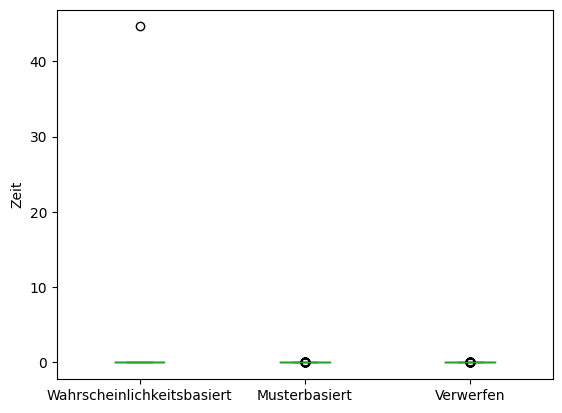

In [3]:
# Pandas dataframe
data = pd.DataFrame({"Wahrscheinlichkeitsbasiert":timeProbabilityBased, "Musterbasiert":timeSampleProductions, "Verwerfen":timeConcatProductions})
ax = data[['Wahrscheinlichkeitsbasiert', 'Musterbasiert', 'Verwerfen']].plot(kind='box', ylabel='Zeit')
plt.show()

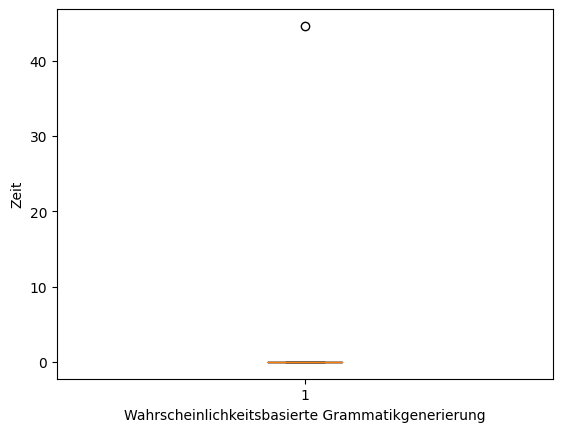

In [4]:
# Comment out the next three lines for default sizing
#f = plt.figure()
#f.set_figwidth(20)
#f.set_figheight(8)
plt.boxplot(timeProbabilityBased)
plt.xlabel('Wahrscheinlichkeitsbasierte Grammatikgenerierung')
plt.ylabel('Zeit')
plt.show()

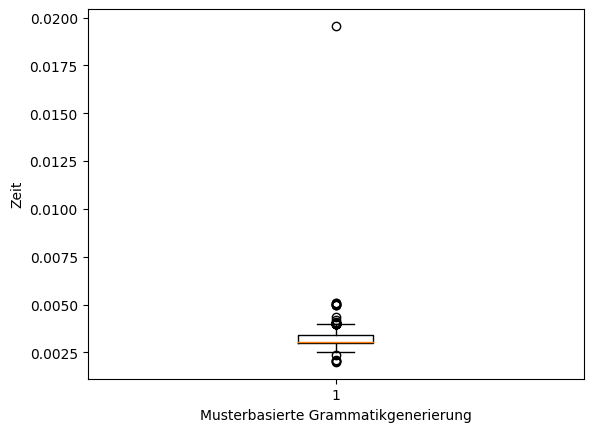

In [5]:
plt.boxplot(timeSampleProductions)
plt.xlabel('Musterbasierte Grammatikgenerierung')
plt.ylabel('Zeit')
plt.show()

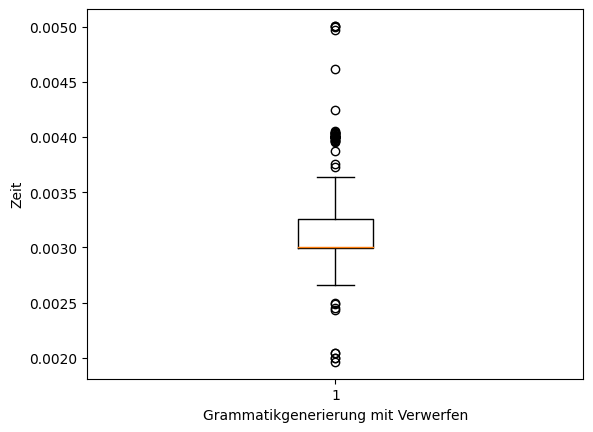

In [6]:
plt.boxplot(timeConcatProductions)
plt.xlabel('Grammatikgenerierung mit Verwerfen')
plt.ylabel('Zeit')
plt.show()
